In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load labeled dataset
df = pd.read_csv("labeled_sessions.csv")
df.head()

,ip,total_hits,bot_hits,unique_paths,avg_interval,label
0,127.0.0.1,7522,6827,6,3.525329,bot


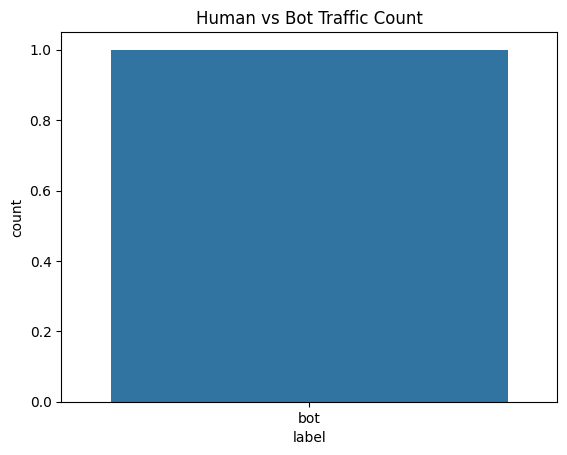

In [12]:
sns.countplot(x='label', data=df)
plt.title("Human vs Bot Traffic Count")
plt.show()

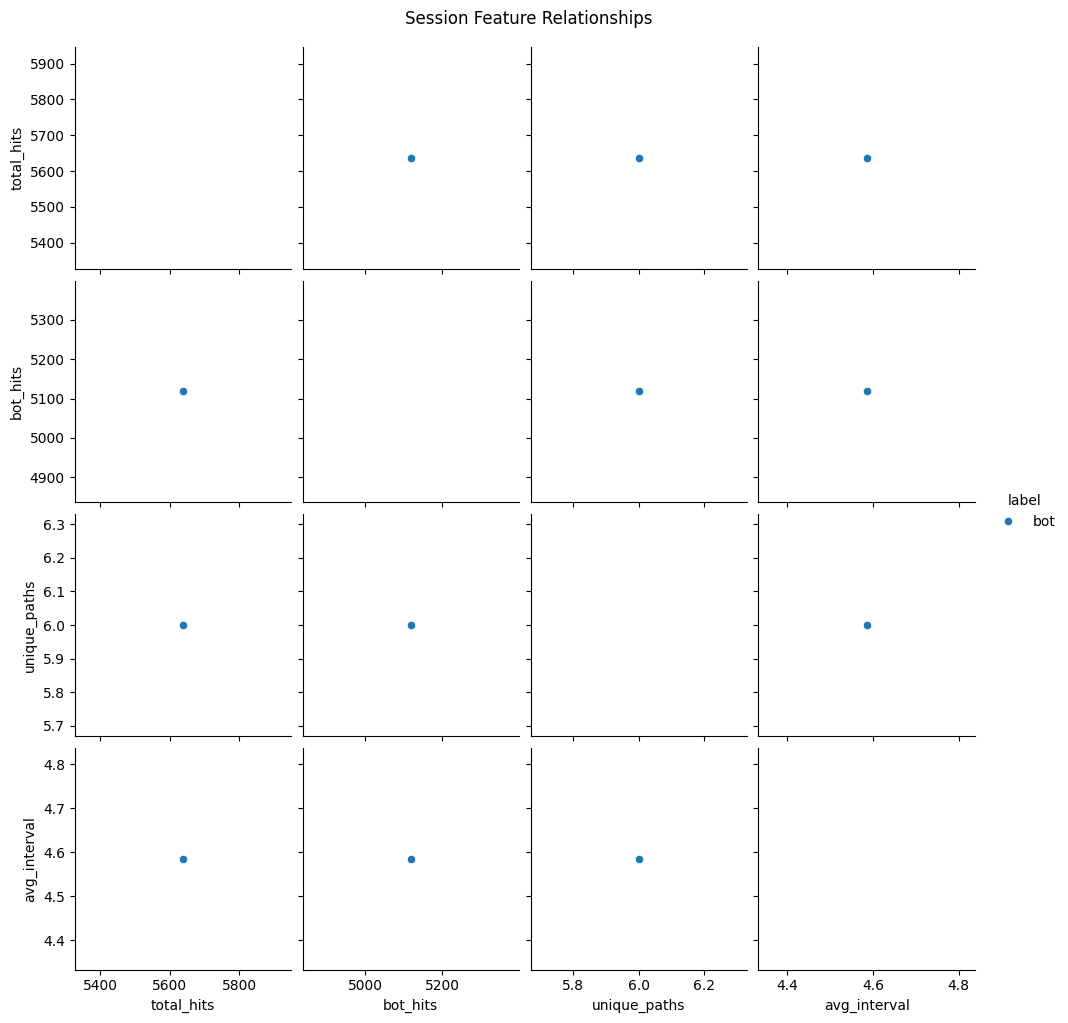

In [13]:
sns.pairplot(df, hue='label')
plt.suptitle("Session Feature Relationships", y=1.02)
plt.show()

/Users/chetanya/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/chetanya/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


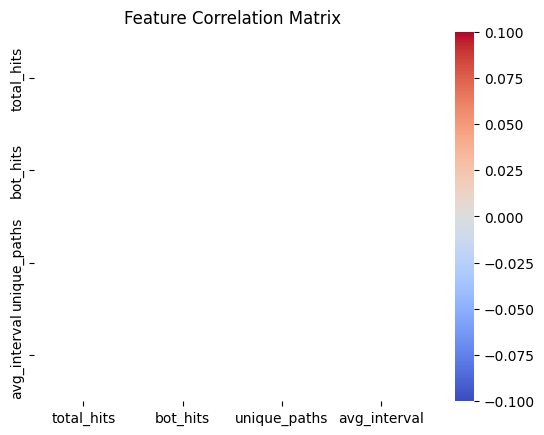

In [14]:
# Drop non-numeric columns like 'ip' and 'label'
sns.heatmap(df.drop(columns=['ip', 'label']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [7]:
print(df.shape)  # Should show (rows, columns)
print(df['label'].value_counts())

(1, 6)
label
bot    1
Name: count, dtype: int64


In [1]:
from sklearn.model_selection import train_test_split
X = df[['total_hits', 'bot_hits', 'unique_paths', 'avg_interval']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

NameError: name 'df' is not defined